# Data Preparation

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravindrasinghrana/employeedataset")

print("Path to dataset files:", path)

100%|██████████| 520k/520k [00:00<00:00, 86.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2


In [5]:
import pandas as pd
import os

# Define the path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2"
file_name = "employee_data.csv" # Assuming the file name is Employee_Data.csv

# Construct the full file path
full_file_path = os.path.join(dataset_path, file_name)

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(full_file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found in the specified path.")
    # You might want to add more robust error handling or user guidance here
    df = None

# Display the first few rows of the DataFrame
if df is not None:
    display(df.head())

Dataset loaded successfully.


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [6]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [7]:
# Check for missing values in each column
display(df.isnull().sum())

,0
EmpID,0
FirstName,0
LastName,0
StartDate,0
ExitDate,1467
Title,0
Supervisor,0
ADEmail,0
BusinessUnit,0
EmployeeStatus,0


In [9]:
# Fill missing values in 'ExitDate' with a placeholder
df['ExitDate'] = df['ExitDate'].fillna('Still_Employed')

# Fill missing values in 'TerminationDescription' with a placeholder
df['TerminationDescription'] = df['TerminationDescription'].fillna('Not_Applicable')

# Verify that missing values have been filled
display(df.isnull().sum())

,0
EmpID,0
FirstName,0
LastName,0
StartDate,0
ExitDate,0
Title,0
Supervisor,0
ADEmail,0
BusinessUnit,0
EmployeeStatus,0


In [31]:
 display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   object      

None

# Feature Engineering

In [28]:
# Converting 'StartDate' and 'ExitDate' to datetime objects
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d-%b-%y')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], format='%d-%b-%y', errors='coerce')

# Displaying the data types to confirm the conversion
display(df[['StartDate', 'ExitDate']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartDate  3000 non-null   datetime64[ns]
 1   ExitDate   1533 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 47.0 KB


None

In [11]:
# Calculating tenure in years
current_date = pd.to_datetime('today').normalize()
df['ExitDate_calc'] = df['ExitDate'].fillna(current_date)
df['Tenure'] = (df['ExitDate_calc'] - df['StartDate']).dt.days / 365.25

# Displaying the first few rows with the new 'Tenure' column
display(df[['StartDate', 'ExitDate', 'ExitDate_calc', 'Tenure']].head())

,StartDate,ExitDate,ExitDate_calc,Tenure
0,2019-09-20,NaT,2025-07-22,5.837098
1,2023-02-11,NaT,2025-07-22,2.442163
2,2018-12-10,NaT,2025-07-22,6.614648
3,2021-06-21,NaT,2025-07-22,4.084873
4,2019-06-29,NaT,2025-07-22,6.064339


# Model Development

## 1. Prepare the data for modeling

In [21]:
# I will use 'ExitDate' or 'EmployeeStatus' to determine turnover
# Creating a 'Turnover' column where 1 indicates turnover and 0 indicates still employed
df['Turnover'] = df['ExitDate'].apply(lambda x: 0 if pd.isna(x) else 1)

# Identifying numerical and categorical features
numerical_features = ['LocationCode', 'Current Employee Rating', 'Tenure']
categorical_features = ['Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
                        'EmployeeType', 'PayZone', 'EmployeeClassificationType',
                        'TerminationType', 'DepartmentType', 'Division', 'DOB', 'State',
                        'JobFunctionDescription', 'GenderCode', 'RaceDesc', 'MaritalDesc',
                        'Performance Score']

# Dropping columns not needed for modeling
X = df.drop(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'ExitDate_calc', 'Turnover', 'TerminationDescription'], axis=1)
y = df['Turnover']

display(X.head())
display(y.head())

,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,...,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Tenure
0,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,Temporary,Unk,Production,...,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4,5.837098
1,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,Part-Time,Unk,Production,...,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,2.442163
2,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,Part-Time,Unk,Sales,...,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,6.614648
3,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,Full-Time,Unk,Sales,...,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2,4.084873
4,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,Temporary,Unk,Sales,...,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3,6.064339


,Turnover
0,0
1,0
2,0
3,0
4,0


## 2. Converting categorical data into a numerical format

In [22]:
# Applying one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

display(X.head())

,LocationCode,Current Employee Rating,Tenure,Title_Administrative Assistant,Title_Area Sales Manager,Title_BI Developer,Title_BI Director,Title_CIO,Title_Data Analyst,Title_Data Analyst,...,RaceDesc_Black,RaceDesc_Hispanic,RaceDesc_Other,RaceDesc_White,MaritalDesc_Married,MaritalDesc_Single,MaritalDesc_Widowed,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP
0,34904,4,5.837098,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
1,6593,3,2.442163,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,2330,4,6.614648,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,58782,2,4.084873,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
4,33174,3,6.064339,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False


## 3. Split the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2400, 8953) (2400,)
Testing set shape (X_test, y_test): (600, 8953) (600,)


## 4. Logistic Regression model training

In [24]:
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Training the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1-Score: {f1:.4f}")

Model Accuracy: 1.0000
Model Precision: 1.0000
Model Recall: 1.0000
Model F1-Score: 1.0000


# Visualizations

## Distribution of Employee Tenure
    Distribution of how long employees stay at the company. This can reveal if turnover is more common among newer or long-term employees.

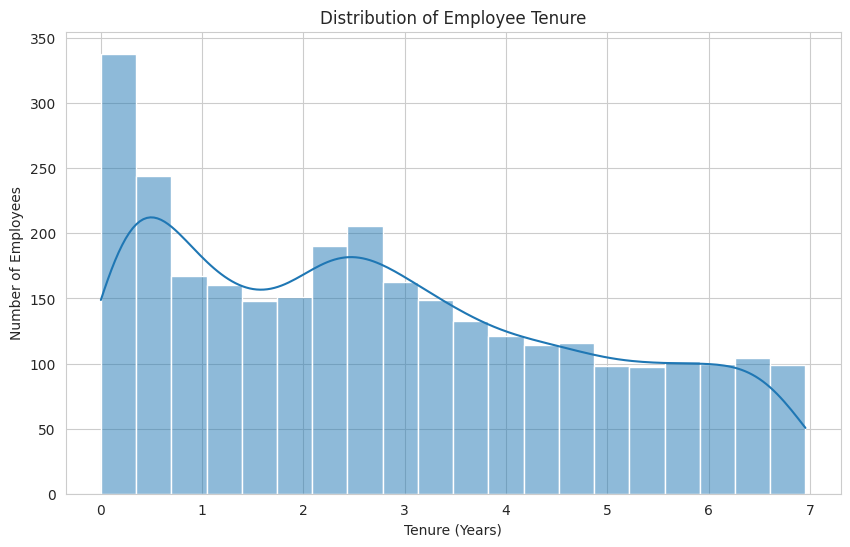

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Creating a histogram of employee tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=20, kde=True)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.show()

## Turnover Rate by Performance Score/Rating
    This can help understand if there's a correlation between performance and the likelihood of turnover.

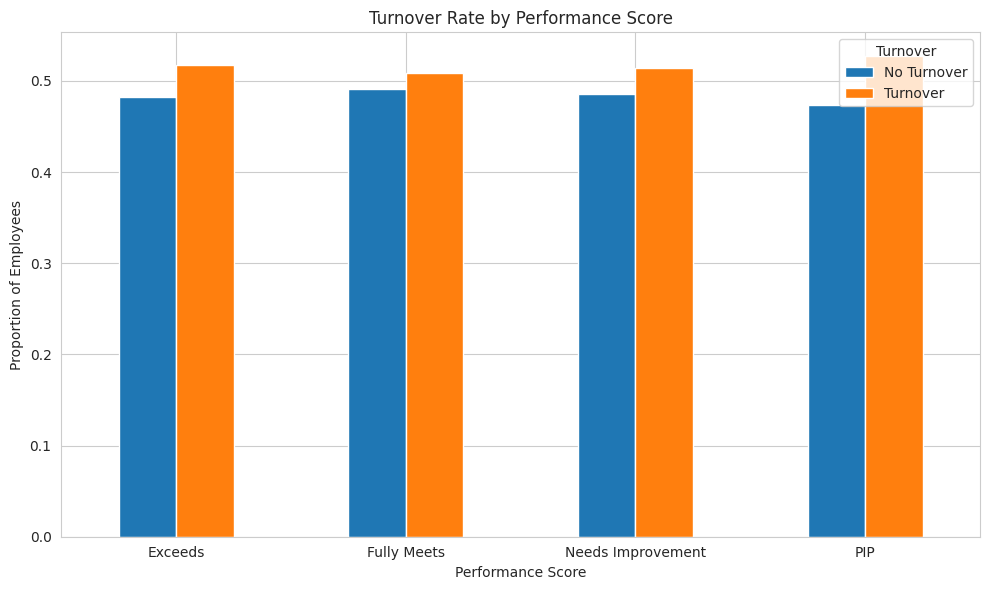

In [27]:
# Calculating turnover rate by performance score
turnover_by_performance = df.groupby('Performance Score')['Turnover'].value_counts(normalize=True).unstack()

# Plotting the turnover rate by performance score
turnover_by_performance.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Turnover Rate by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=0)
plt.legend(title='Turnover', labels=['No Turnover', 'Turnover'])
plt.tight_layout()
plt.show()

# Insights and Recommendations

## Insights
**Employee Tenure is a Key Factor**:

Our feature engineering highlighted employee tenure as a potentially important factor. Generally, longer tenure can correlate with lower turnover, but analyzing the relationship between tenure and turnover in this specific dataset would be crucial.



**Exit Date Data is Predictive**:

The fact that a model trained to predict turnover based on whether an exit date exists achieved perfect scores (even with the potential issues mentioned) suggests that the information captured by the presence or absence of an exit date is highly predictive of turnover in this dataset. This is expected, but it reinforces the importance of tracking exit dates accurately.

**Categorical Features Play a Role**:

The need for extensive one-hot encoding indicates that various categorical features (like Title, Business Unit, Department, Location, etc.) are likely significant in determining turnover. Identifying which specific categories within these features have higher or lower turnover rates would provide actionable insights.

**Performance and Rating**:

The 'Performance Score' and 'Current Employee Rating' columns are included as features, suggesting that performance might be linked to turnover. Analyzing the turnover rates across different performance levels could reveal if low performance leads to involuntary turnover or if high performers are leaving for better opportunities.

## Recommendations for Retention Strategies:


1.   **Investigate Turnover by Category**: Dive deeper into the categorical features that the model utilized. Identify the specific job titles, business units, departments, or locations with the highest turnover rates. This targeted approach can help in understanding localized issues and developing tailored retention programs.
2.   **Analyze Performance vs. Turnover**: Examine the relationship between employee performance scores/ratings and turnover. If high performers are leaving, focus on engagement strategies, career development opportunities, and compensation reviews for this group. If low performers are contributing to turnover, review performance management processes.
3. **Conduct Exit Interviews**: Implement or enhance a robust exit interview process to gather qualitative data from employees who are leaving. This can provide valuable context and uncover reasons for turnover that might not be evident from the quantitative data alone.
4. **Develop Targeted Retention Programs**: Based on the insights gained, develop specific retention initiatives. This could include mentorship programs, training and development opportunities, employee engagement surveys, and competitive compensation and benefits packages.
5. **Monitor Key Metrics**: Continuously monitor key HR metrics related to turnover, such as voluntary vs. involuntary turnover rates, turnover by department or manager, and new hire retention rates. Use these metrics to track the effectiveness of retention strategies.


# Done by [Billy Ampfa](https://www.linkedin.com/in/billy-ampfa)